In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
from math import ceil
from scipy.stats import binom_test
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from glob import glob
import os
from plotting.plot import pretty_behav_plot

%load_ext autoreload
%autoreload 2

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Behavioral data

In [2]:
allsubjdirs = sorted(glob('../../bids/sub-*'))
subjlist = [f'sub-{s:03d}' for s in range(1, 36)] #if s != 6]
allsubjs_trials = pd.DataFrame()
for i, s in enumerate(subjlist):
    behfile = glob(os.path.join('../../bids', s, 'func', '*beh.tsv'))[0]
    behav = pd.read_csv(behfile, sep='\t')
    behav.insert(0, 'Subject', i + 1)
    allsubjs_trials = pd.concat([allsubjs_trials, behav])

In [3]:
events = pd.read_csv(glob(os.path.join('../../bids', s, 'func', '*test_run-1_events.tsv'))[0], sep='\t')

In [4]:
events

,onset,duration,trial_no,event_no
0,15.067397,0,0,1
1,16.078584,0,0,2
2,18.083930,0,0,3
3,18.583781,0,0,4
4,19.083901,0,0,5
...,...,...,...,...
571,385.438181,0,47,8
572,385.532651,0,47,9
573,385.587148,0,47,10
574,385.641675,0,47,11


In [5]:
glob('../../bids/sub-035/func/*')

['../../bids/sub-035/func/sub-035_task-test_beh.tsv',
 '../../bids/sub-035/func/sub-035_task-funcloc_run-1_events.tsv',
 '../../bids/sub-035/func/sub-035_task-funcloc_run-2_events.tsv',
 '../../bids/sub-035/func/sub-035_task-train_run-1_events.tsv',
 '../../bids/sub-035/func/sub-035_task-train_run-2_events.tsv',
 '../../bids/sub-035/func/sub-035_task-train_run-3_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-1_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-2_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-3_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-4_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-5_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-6_events.tsv',
 '../../bids/sub-035/func/sub-035_task-test_run-7_events.tsv']

In [6]:
A90mask = ((behav['InitView']==1) & (behav['FinalView']==90) & (behav['Sequence_2']==15))
B90mask = ((behav['InitView']==2) & (behav['FinalView']==90) & (behav['Sequence_2']==15))
        
A90_E_indx = behav.index[(behav['Consistent']==1) & A90mask]
B90_E_indx = behav.index[(behav['Consistent']==1) & B90mask]

A90_U_indx = behav.index[(behav['Consistent']==0) & B90mask]
B90_U_indx = behav.index[(behav['Consistent']==0) & A90mask]

In [7]:
min(len(A90_U_indx), len(B90_U_indx))

7

In [8]:
import random
random.sample(list(B90_U_indx), 3)

[89, 220, 95]

In [9]:
list(B90_U_indx)

[41, 89, 95, 105, 145, 220, 242]

In [10]:
allsubjs_trials

,Subject,Scene,InitView,FinalView,Diff,Orients_1,Orients_2,Consistent,Hit,RT,Sequence_1,Sequence_2,Sequence_3,Sequence_4,Sequence_5,Jitter,Fix
0,1,7,1,90,5.0,0,5.0,1,1.0,0.763023,0,15,30,45,90,152,148
1,1,3,2,30,5.0,0,5.0,1,1.0,0.706215,0,15,20,25,30,129,171
2,1,13,2,30,-5.0,-2,-7.0,0,1.0,0.783116,0,15,20,25,30,145,155
3,1,20,2,90,-4.5,0,-4.5,1,1.0,1.191430,0,30,45,50,90,176,124
4,1,13,2,90,-4.0,-1,-5.0,1,0.0,1.267132,0,20,45,55,90,168,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,35,4,1,30,0.5,0,0.5,1,1.0,0.526852,0,15,20,25,30,126,174
332,35,9,1,90,0.5,-2,-1.5,1,1.0,0.891972,0,20,30,50,90,127,173
333,35,8,1,30,0.5,2,2.5,1,1.0,0.900208,0,15,20,25,30,139,161
334,35,13,2,30,-0.5,1,0.5,1,1.0,0.426043,0,15,20,25,30,159,141


In [11]:
for subj in range(1, 36):
    thissubj = allsubjs_trials[allsubjs_trials['Subject']==subj]
    rot15_trials = thissubj[(thissubj['FinalView']==90)&(thissubj['InitView']==2)&(thissubj['Sequence_2']==15)]
    print(f'Subject {subj}, {len(rot15_trials)}, incongruent: {rot15_trials.Consistent.value_counts().get(0, 0)}')

Subject 1, 28, incongruent: 6
Subject 2, 29, incongruent: 9
Subject 3, 25, incongruent: 6
Subject 4, 26, incongruent: 4
Subject 5, 28, incongruent: 7
Subject 6, 18, incongruent: 3
Subject 7, 25, incongruent: 7
Subject 8, 22, incongruent: 5
Subject 9, 25, incongruent: 5
Subject 10, 30, incongruent: 8
Subject 11, 28, incongruent: 7
Subject 12, 23, incongruent: 7
Subject 13, 22, incongruent: 4
Subject 14, 23, incongruent: 5
Subject 15, 21, incongruent: 7
Subject 16, 21, incongruent: 3
Subject 17, 33, incongruent: 9
Subject 18, 31, incongruent: 11
Subject 19, 30, incongruent: 9
Subject 20, 22, incongruent: 5
Subject 21, 23, incongruent: 5
Subject 22, 37, incongruent: 7
Subject 23, 26, incongruent: 6
Subject 24, 30, incongruent: 9
Subject 25, 20, incongruent: 7
Subject 26, 33, incongruent: 11
Subject 27, 23, incongruent: 7
Subject 28, 28, incongruent: 6
Subject 29, 22, incongruent: 5
Subject 30, 28, incongruent: 9
Subject 31, 20, incongruent: 6
Subject 32, 36, incongruent: 10
Subject 33, 27

In [25]:
allsubjs_trials[allsubjs_trials['FinalView']==90].Sequence_2.value_counts()/5880

15    0.308503
20    0.228912
25    0.174320
30    0.126531
35    0.081633
40    0.047279
45    0.024660
50    0.008163
Name: Sequence_2, dtype: float64

In [20]:
len(allsubjs_trials[allsubjs_trials['FinalView']==90].Sequence_2)

5880

In [22]:
secondviews = allsubjs_trials[allsubjs_trials['FinalView']==90].Sequence_2.to_list()

In [24]:
len(secondviews)

5880

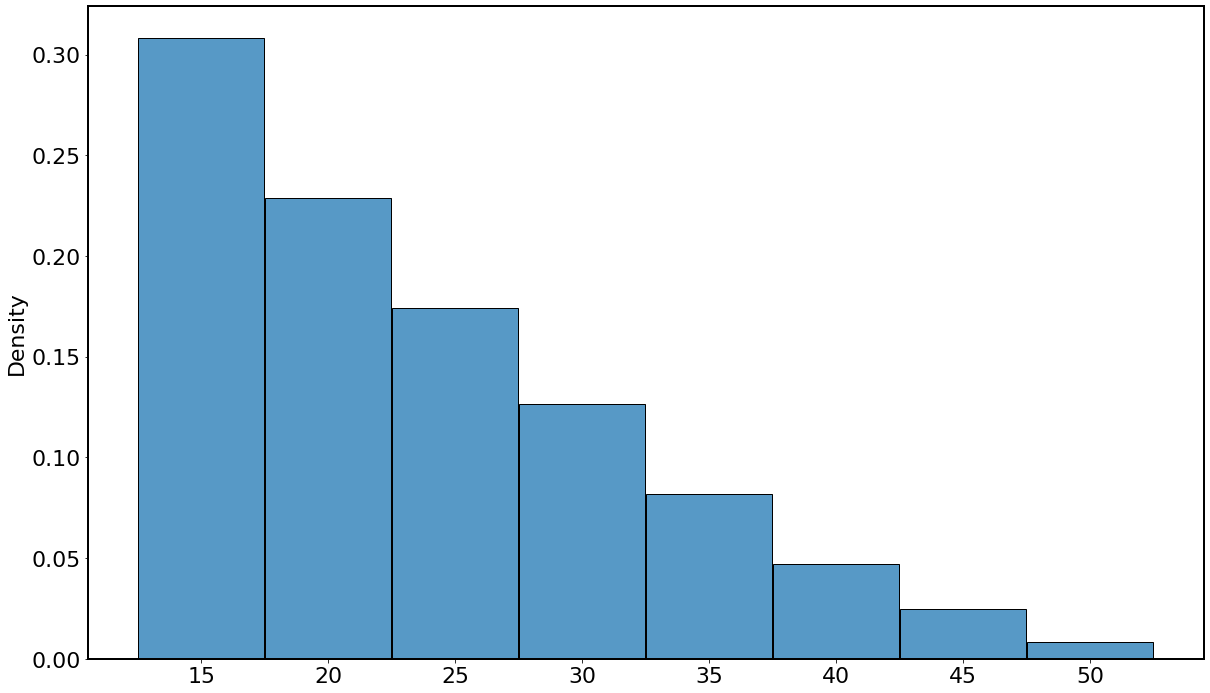

In [45]:
plt.figure(figsize=(20, 12))
ax = sns.histplot(data=secondviews, 
         stat='density', discrete=True, kde=False,
         shrink=4.95)
ax.tick_params(axis='both', labelsize=22)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
plt.savefig('results_plots/view_density.png')

## Plot staircases

In [ ]:
n_missed = []
remove_subjs = []
fig = plt.figure(figsize=(15,10))
nsubjs = len(allsubjs_trials.Subject.unique())
for s in allsubjs_trials.Subject.unique():
    thisstair = np.array(abs(allsubjs_trials.loc[allsubjs_trials['Subject'] == s]['Diff']))
    realstair = abs(allsubjs_trials[allsubjs_trials['Subject']==s].Orients_1.values - 
                   allsubjs_trials[allsubjs_trials['Subject']==s].Orients_2.values)
    theseresps = np.array(allsubjs_trials.loc[allsubjs_trials['Subject'] == s]['Hit'])
    howmuchceil = sum(realstair==10)
    missingtrials = np.count_nonzero(np.isnan(theseresps))
    n_missed.append(missingtrials)
    ax = fig.add_subplot(ceil(nsubjs/4), 4, s)
    ax.set_ylim([0, 25])
    k = np.nansum(theseresps)
    n = len(thisstair)
    if binom_test(k, n, p=0.5, alternative='greater')>0.05:
    #if howmuchceil >= len(thisstair)/4 or missingtrials >= len(thisstair)/3:
        #print(k/n)
        ax.plot(thisstair, 'r')
        remove_subjs.append(s)
    else:
        ax.plot(thisstair, 'k')
    ax.plot(realstair, 'b')

In [ ]:
# Which participants to remove
remove_subjs

In [ ]:
#allsubjs_trials = allsubjs_trials[~allsubjs_trials['Subject'].isin(remove_subjs)]

## Expected vs Unexpected t-test

In [ ]:
allsubj_means = allsubjs_trials.groupby(['Subject', 'Consistent']).mean().reset_index()

In [ ]:
allsubj_means.groupby(['Consistent'])['Hit'].agg(['mean', 'sem'])

In [ ]:
pg.ttest(allsubj_means[allsubj_means['Consistent']==1]['Hit'], 
         allsubj_means[allsubj_means['Consistent']==0]['Hit'], paired=True)

## Plot

In [ ]:
pretty_behav_plot(allsubj_means, saveimg=True)

In [ ]:
# Get all differences
alldiffs = []
for sub in allsubj_means.Subject.unique():
    thisdiff = allsubj_means[(allsubj_means.Subject==sub)&(allsubj_means.Consistent==1)].Hit.values[0]-\
               allsubj_means[(allsubj_means.Subject==sub)&(allsubj_means.Consistent==0)].Hit.values[0]
    alldiffs.append({'Subject': sub, 'Difference': thisdiff})
alldiffs = pd.DataFrame(alldiffs)

In [ ]:
fig = plt.figure(figsize=(10,8))
gs = GridSpec(1, 2, figure=fig)
with sns.axes_style('white'):
    #ax0 = fig.add_subplot(121)
    ax0 = fig.add_subplot(gs[0, :-1])
    sns.barplot(x='Consistent', y='Hit', data=allsubj_means, ci=68, order=[1.0, 0.0], palette='Set2', ax=ax0)
    ax0.set_ylabel('Hit rate', fontsize=24)
    plt.yticks(fontsize=20) 
    ax0.set_xlabel(None)
    ax0.set_xticklabels(['Expected', 'Unexpected'], fontsize=20)
    ax0.set(ylim=(0.5, 0.75))
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
with sns.axes_style('white'):
    #ax1 = fig.add_subplot(122)
    ax1 = fig.add_subplot(gs[0, -1])
    sns.violinplot(y='Difference', data=alldiffs, color=".8", inner=None)
    sns.stripplot(y='Difference', data=alldiffs, jitter=0.07, ax=ax1, color='black', alpha=.5)
    # Get mean and 95% CI:
    meandiff = alldiffs['Difference'].mean()
    tstats = pg.ttest(alldiffs['Difference'], 0.0)
    ci95 = tstats['CI95%'][0]
    #plt.gca().set_aspect('equal')
    #ax1.axis('equal')
    for tick in ax1.get_xticks():
        ax1.plot([tick-0.1, tick+0.1], [meandiff, meandiff],
                    lw=4, color='k')
        ax1.plot([tick, tick], [ci95[0], ci95[1]], lw=3, color='k')
        ax1.plot([tick-0.01, tick+0.01], [ci95[0], ci95[0]], lw=3, color='k')
        ax1.plot([tick-0.01, tick+0.01], [ci95[1], ci95[1]], lw=3, color='k')
        #circlemarker = matplotlib.patches.Ellipse((tick+0.0032, meandiff), 0.06, 0.02, color='k')
        #ax1.add_patch(circlemarker)
    ax1.axhline(0.0, linestyle='--', color='black')
    plt.yticks(fontsize=20) 
    ax1.set_ylabel('Δ Hit rate', fontsize=24)
    ax1.set(ylim=(-0.2, 0.4))
    ax1.axes_style = 'white'
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
plt.tight_layout()
#plt.savefig('Plots/Behav_acc.pdf')

## Demographic information

In [ ]:
particfile = '../../bids/participants.tsv'
particinfo = pd.read_csv(particfile, sep='\t')

In [ ]:
#particinfo = particinfo[particinfo.participant_id!='sub-006']

In [ ]:
particinfo.age.agg(['mean', 'std'])

In [ ]:
particinfo.sex.value_counts()